<a href="https://colab.research.google.com/github/fabnancyuhp/DEEP-LEARNING/blob/main/NOTEBOOKS/CLASSIFICATION_ANNs_ON_STRUCTURED_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example : IRIS DATA
The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.<br>
The data set consists of 150 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. 



In [4]:
import pandas as pd
iris = pd.read_csv("https://raw.githubusercontent.com/fabnancyuhp/DEEP-LEARNING/main/DATA/Iris.csv")

iris = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']]
iris.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


The goal of the neural network, we are going to create is to predict the class of the Iris flower based on other attributes. Meaning it needs to create a model, which is going to describe a relationship between attribute values and the class.<br><br>
Now we can extract the features values and the targets.

## Data preprocessing
First, we split the dataset into feature values and target values:
* X are the feature values
* Y are the target values

In [8]:
X = iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
Y = iris[['Species']]

We display the distinct species:

In [7]:
Y['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

We have to encode the species using LabelEncoder from sklearn.

In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(Y['Species'].unique())

Y_encode = le.transform(Y['Species'])
le.inverse_transform([0,1,2])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Categorizing target values
When we deal with a multiclass classification, we use the cross-entropy loss function. There are two ways of using the cross-entropy loss in tensorflow.keras:
* tf.keras.losses.CategoricalCrossentropy
* tf.keras.losses.SparseCategoricalCrossentropy

When we use tf.keras.losses.CategoricalCrossentropy, we’ll have to convert the target values into categorical format first – with one-hot encoding, or to_categorical in Keras.<br><br>

When we have integer targets instead of categorical vectors as targets, we can use sparse categorical crossentropy. It’s an integer-based version of the categorical crossentropy loss function, which means that we don’t have to convert the targets into categorical format anymore.

In [16]:
from tensorflow.keras.utils import to_categorical

Y_vect_cat = to_categorical(Y_encode,num_classes=3)
Y_vect_cat[0:2]

array([[1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

## Split into a training set and test set

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.values, Y_vect_cat, test_size=0.2, random_state=42)

## Building the model with categorical_crossentropy loss
We build an ANN with the following layers:
* Dense layer with 10 units and activation='relu'
* BatchNormalization layer
* Dropout layer with rate 0.1
* Dense layer with 10 units and activation='relu'
* Dense layer with 3 units and activation='softmax'

We compile our model with optimizer='adam', loss='categorical_crossentropy' and 

In [27]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization 
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Dense(10,activation='relu',input_shape=(4,)))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(10, activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

## Fit the model and evaluate it
We fit the model with 300 epochs. We set batch_size to 10.

In [28]:
model.fit(X_train, y_train, epochs=300, batch_size=10,verbose=0,validation_split=0.1)

We evaluate the model:

In [29]:
model.evaluate(X_test, y_test)


1/1 [==============================] - 0s 21ms/step - loss: 0.0658 - accuracy: 1.0000


[0.06580964475870132, 1.0]

## Trying the model on a new sample
We create a probability vector with our model:

In [37]:
x_sample = X_test[8]
x_sample = x_sample.reshape(1,4)
vect_proba = model.predict(x_sample)
vect_proba

array([[6.1726540e-05, 7.2145969e-01, 2.7847856e-01]], dtype=float32)

In [43]:
import numpy as np
pred_cat_num = np.argmax(vect_proba)
pred_cat_label = le.inverse_transform([pred_cat_num])
true_cat_label = le.inverse_transform([np.argmax(y_test[8])])
print("the predited class is: "+str(pred_cat_label))
print("the true class is: "+str(true_cat_label))

the predited class is: ['Iris-versicolor']
the true class is: ['Iris-versicolor']


## Building the model with spars_categorical_crossentropy loss

The ANN we build here has the architecture of the previous except the number of units of the last layer and the loss function. We rebuild the training set and test set. Now, the target values are made from the integer numpy array Y_encode.

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, Y_encode, test_size=0.2, random_state=42)
y_train[0:4]

array([0, 0, 1, 0])

We build the new ANN. When we use the sparse_categorical_crossentropy loss function, the last Dense layer has 3+1 units, where 3 equals the number of distinct classes in our dataset.<br>
We compile our new ANN with the 'sparse_categorical_crossentropy' loss function.

In [51]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization 
from tensorflow.keras.models import Sequential

model_new = Sequential()
model_new.add(Dense(10,activation='relu',input_shape=(4,)))
model_new.add(BatchNormalization())
model_new.add(Dropout(0.1))
model_new.add(Dense(10, activation='relu'))
model_new.add(Dense(4,activation='softmax'))

model_new.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

We fit the new ANN with 300 epochs and evaluate it.

In [50]:
model.fit(X_train,y_train,epochs=300,batch_size=10,verbose=0,validation_split=0.1)
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 30ms/step - loss: 0.0453 - accuracy: 0.9667


[0.04528772830963135, 0.9666666388511658]

# Exemple: Red Wine Quality Classification
In this example, we build an ANN that predicts the wine quality. We first import the dataset.

In [3]:
import pandas as pd
winequality = pd.read_csv("https://raw.githubusercontent.com/fabnancyuhp/DEEP-LEARNING/main/DATA/winequality-red.csv").astype('float32')
winequality.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0


We get the number of distinct classes. We have 6 classes.

In [57]:
winequality['quality'].unique()

array([5., 6., 7., 4., 8., 3.], dtype=float32)

## Split dataset into feature variables and target values
* X = feature values
* Y = target values 

In the cell below, we use the .values method to convert a pandas.data frame into a NumPy array more suitable for a Keras model.

In [4]:
import numpy as np
#nb_classes = len(np.unique(y))
#print("The number of classe is: "+str(nb_classes))

x = winequality.drop(['quality'], axis=1).values
y = winequality['quality'].values

#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)#

## Data prerpocessing
Since we have a multiclass classification problem we'll use the categorical cross-entropy loss function in our model. To apply that kind of loss function, we should convert our target values into categorical vectors.
* In the first step, we encode y with LabelEncoder.
* Secondly, we apply to_categorical with num_class=6 

In [10]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder 

#we encode y with LabelEncoder.
le = LabelEncoder()
le.fit(np.unique(y))
y_encod = le.transform(y)
y_cat = to_categorical(y_encod ,num_classes=6)
y_cat[0:2]

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

## Split into training set and test set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y_cat, test_size=0.2, random_state=42)
y_train[0:4]

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

## Building ANN to predict wine quality
Since we deal with a 6 classes problem, we build a neural network model such that:
* The loss function is the categorical_crossentropy
* The output layer yields a 6 sized probability vector
* The output layer activation function is the softmax function

We put some BatchNormalization layers and some Dropouts layer in our sequential model.


In [36]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, InputLayer
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(InputLayer(input_shape=(x.shape[1],)))
model.add(BatchNormalization())
model.add(Dense(70,activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())          
model.add(Dense(60,activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
#model.add(Dense(12,activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(6,activation='softmax'))


We compile the model and train it.

In [37]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=800,validation_split=0.1,verbose=0) #verbose=0

We evaluate the model over the test set:

In [38]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 1.0793 - accuracy: 0.6281


[1.0792872905731201, 0.628125011920929]

We display the model learning history:

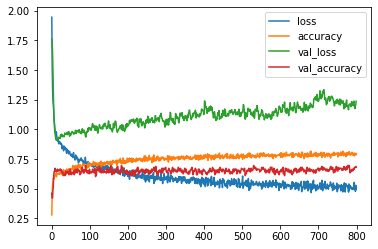

In [39]:
pd.DataFrame(history.history).plot()

## We try the model we've just trained over a new sample:
* We create a probability vector
* We display the predicted class

In [51]:
x_new = X_test[20].reshape(1,-1)
proba_vect = model.predict(x_new)
pred_num_class = np.argmax(proba_vect)
pred_class = le.inverse_transform([pred_num_class])
true_class = le.inverse_transform([np.argmax(y_test[20])])
print("predicted class : "+str(pred_class))
print("Tue class : "+str(pred_class))

predicted class : [5.]
Tue class : [5.]


# Exercise : Classification on Diabetes Data

In this exercise, we deal with a diabetes dataset. First, you have the run the cell below to import and view the head of the dataset. 

In [52]:
import pandas as pd
from tensorflow.keras.utils import get_file
csv_file = get_file('diabetes.csv', 'https://raw.githubusercontent.com/fabnancyuhp/DEEP-LEARNING/main/DATA/diabetes.csv')

diabetes = pd.read_csv(csv_file)
diabetes.head()

32768/23873 [=========================================] - 0s 0us/step


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


It is a binary classification problem where we have to say if their onset of diabetes is 1 or not as 0.

1) Take a look at the above-displayed data set. Which columns do you choose for the features? What is the target? Make a code to select the features and the target.


2) Split the dataset into a training set and a test set using train_test_split.

3) How many classes are there on the target? Which loss function do you choose?

4) Make a neural network and compile it with TensorFlow.keras to solve this classification problem. 
You have to respect the following architecture: BatchNormalization layer following the input of the network, 2 hidden layers with 12 units and a l2 regularizer.

5) Train your neural network with 600 epochs and set validation_split=0.1. Use X_train and y_train.

6) Evaluate your model on the test set.

5) How many trainable parameters does your neural network have?

1) Take a look at the above-displayed data set. Which columns do you choose for the features? What is the target? Make a code to select the features and the target. Store the target into Y and the features into X.

In [64]:
#your code here
X = diabetes.drop(['Outcome'],axis=1)
Y = diabetes['Outcome']

2) Split the dataset into a training set and a test set using train_test_split. Set test_size=0.2.

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

3) How many classes are there on the target? Which loss function do you choose?

In [66]:
#your code here.

4) Make a neural network and compile it with TensorFlow.keras to solve this classification problem. You have to respect the following architecture: 
* InputLayer
* BatchNormalization 
* Dense layer with 12 units, activation='relu', a l2 kernel_regularizer with l2 regularization factor=0.01.
* Dense layer with 12 units, activation='relu', a l1 kernel_regularizer with l1 regularization factor=0.01.
* The output layer : a Dense layer with 1 unit, activation='sigmoid' 

In [67]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2,l1

model = Sequential()

5) Compile your model with:
* an adam optimizer
* loss= 'binary_crossentropy'
* accuracy metrics

In [69]:
#Your code here

6) Fit your model with:600 epochs and validation_split=0.1.

In [70]:
#your code here

7) Evaluate your model on the test set.

In [71]:
#your code here

8) Apply your model on the following point:

In [79]:
import numpy as np
x_to_try = np.array([  0.  , 162.   ,  76.   ,  56.   , 100.   ,  53.2  ,   0.759,25. ])